# ECE-143-Wildfire-Project

The Group Repository containing everyone's code.

**Team Members:** 

David Belman, Aiden Rosen, Mahesh  
Ananthakrishnan Rameshkumar, Boran Jia, & Jacob Brown  


## Objective: 

The Purpose of this project is to Perform comprehensive analysis on forest fires, analyzing cause, size of fire, seasonal effects, spatial effects and terrain effects.  

## Data Extraction and Cleaning

This code uses our functions defined in DataExtractionCleaning.py to put our data into a Pandas Dataframe and has functions designed to filter data.

In [1]:
#necessary imports
from Data_Extracting_and_Cleaning import DataExtractionCleaning as dec
#from Data_Extracting_and_Cleaning.Utils import Directory_utils as Dir
from Analysis_and_Visualization_for_Obtaining_Statistics import AnalysisVisualization as anl


In [2]:
#load the Dataset
df = dec.Get_all_data("af-historic-wildfires-1996-2005-data.csv")

## Analysis and Visualization

Breakdown of Fires by Year:

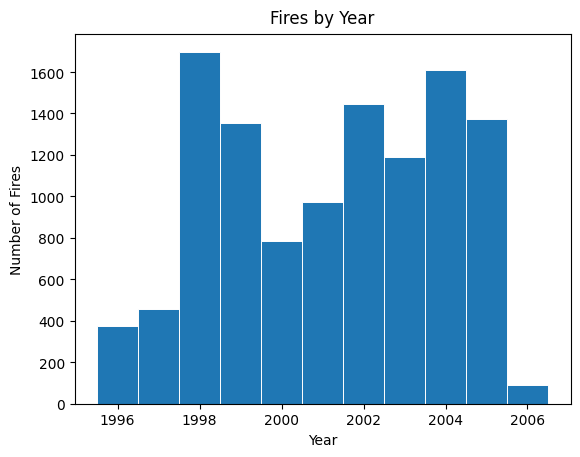

In [3]:
anl.plot_graph_of_series(df["calendar_year"].value_counts(sort=False), "bar", "Fires by Year", ["Year", "Number of Fires"])

Pie Chart of the general Causes of Fires

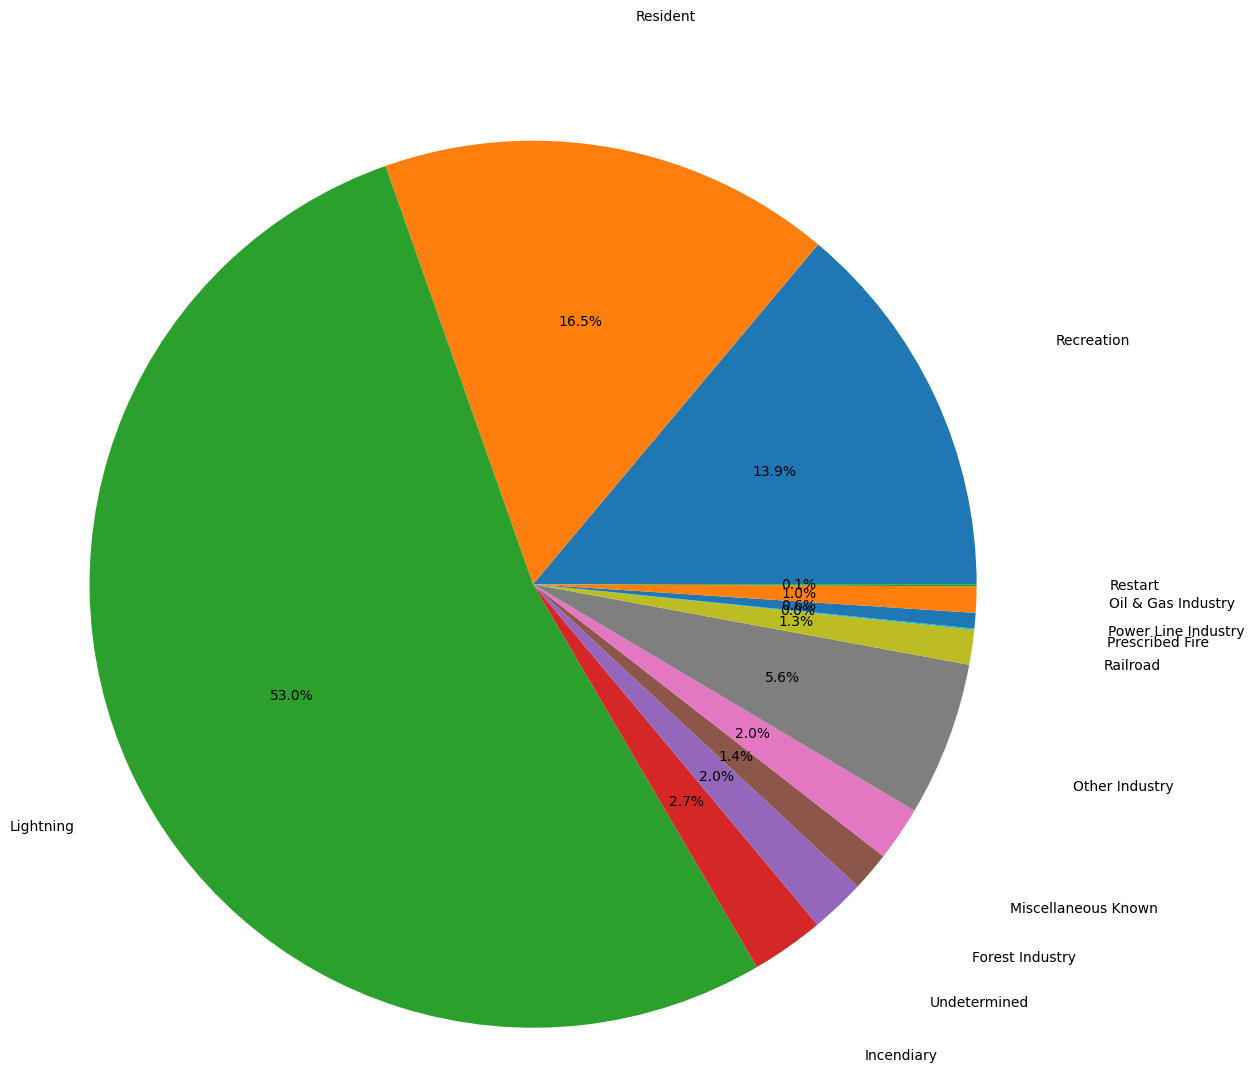

In [4]:
anl.plot_graph_of_series(df["general_cause_desc"].value_counts(sort = False), "pie", "",)

When the general cause is not lightning our dataset provides us with a secondary True Cause when reported.

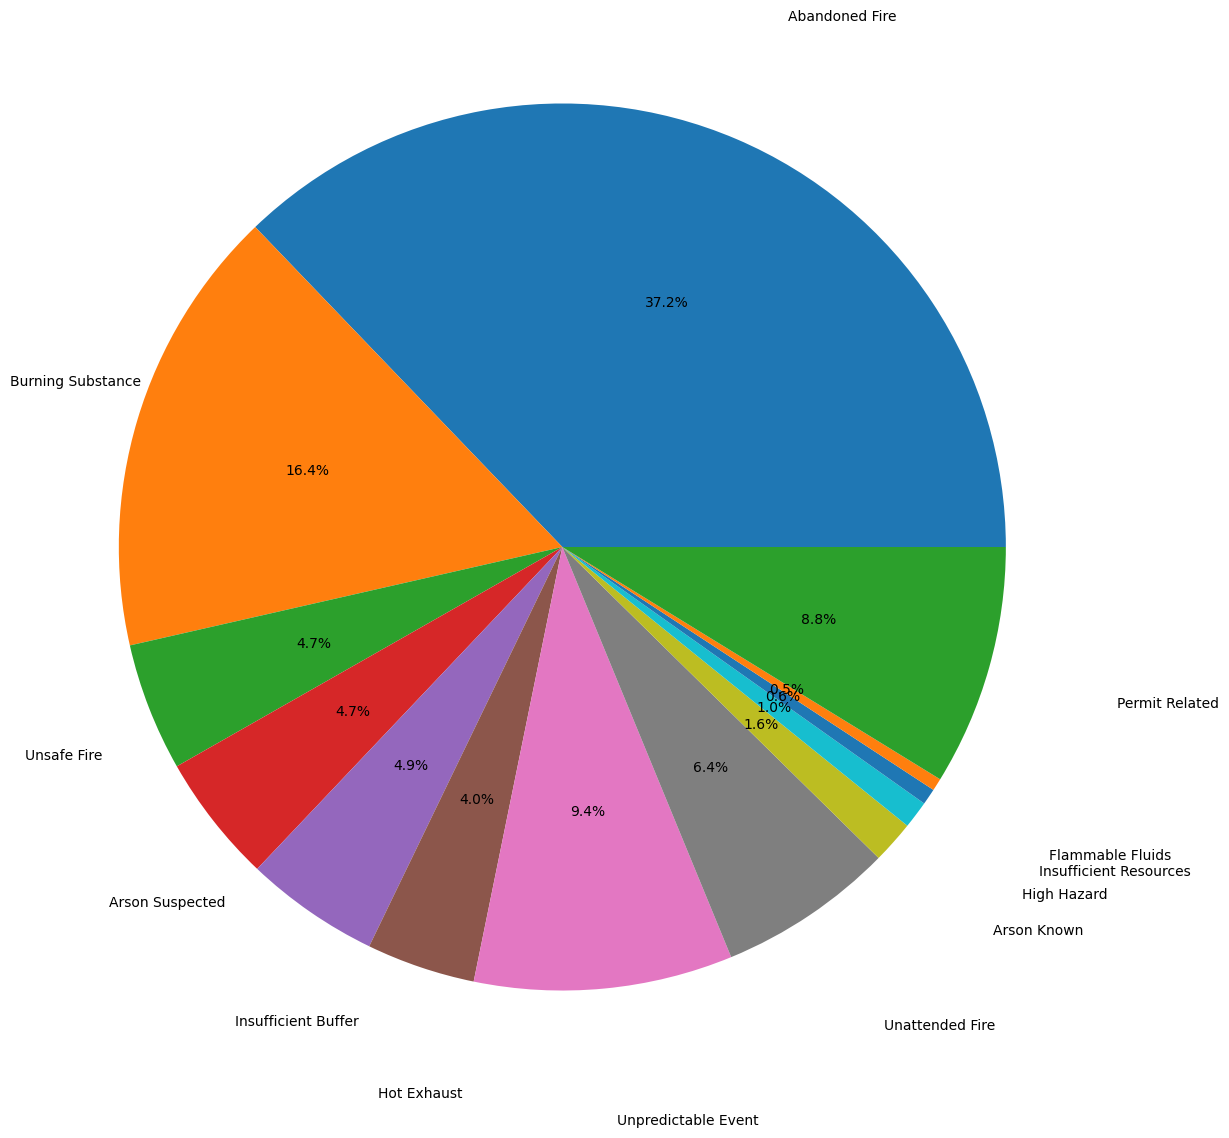

In [5]:
anl.plot_graph_of_series(df["true_cause"].value_counts(sort= False), "pie", "",)

Breakdown of fires cause by industry

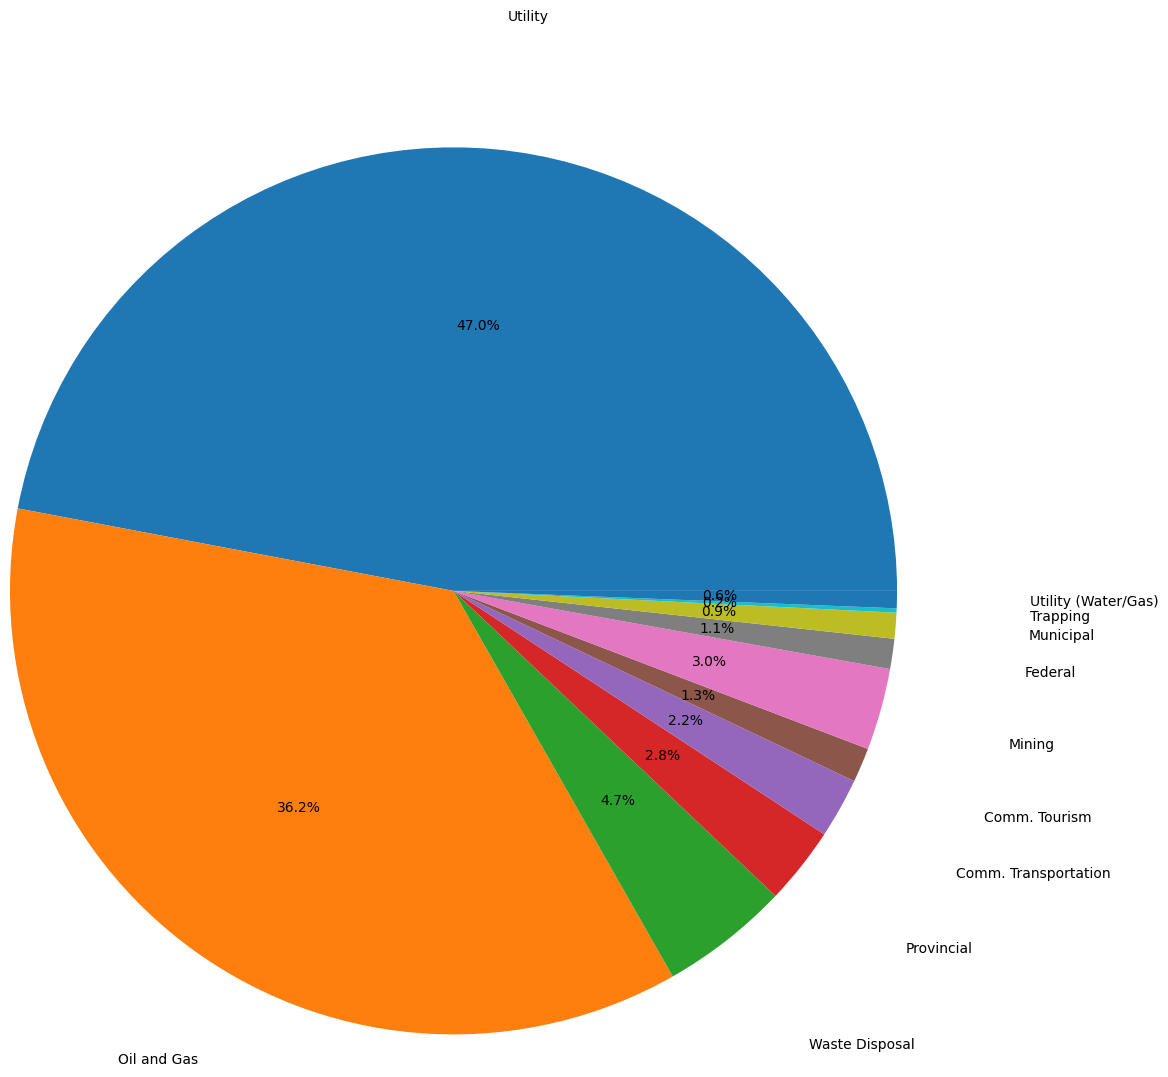

In [6]:
anl.plot_graph_of_series(df["industry_identifier_desc"].value_counts(sort= False), "pie", "",)

In [ ]:
anl.plot_graph_of_series( , "bar", "Fires by Year", ["Year", "Number of Fires"])

## Predictions